## 📈 Book Orders Data Analysis (GP Dataset)
This analysis explores the top-selling books, city-wise orders, revenue estimates, and trends over time using Pandas, metplotlib and NumPy.


**Data Clean**

In [1]:
import pandas as pd
!pip install -q ydata-profiling
from ydata_profiling import ProfileReport    


# Clean whitespace and lowercase City and Book Name
df = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')


df['City'] = df['City'].str.strip().str.lower()
df['Book Name'] = df['Book Name'].str.strip().str.title()

# Convert 'Order Date & Time' to datetime
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])


**1.Breif Report file**

##  GP Orders Dataset  Exploratory Data Analysis Report

This report provides a comprehensive exploratory data analysis (EDA) of the **Gufhtugu Publications Orders Dataset**. The report was generated using **Pandas Profiling**, offering insights into the dataset's structure, distributions, correlations, missing values, and more.  
📁 File: `GP_Orders_Report.html`


In [2]:



df = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')

#  Build and save the profile report.
profile = ProfileReport(df, title="GP Orders Report", explorative=True)
profile.to_file("GP_Orders_Report.html")      # HTML saved in the notebook workspace




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:05<00:00,  1.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**2. Display Top 5 Rows**

In [3]:
df.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


**3.Display Last 5 rows**

In [4]:
df.tail()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
19234,71332,Completed,Linux - An Introduction,1/25/2021 12:46,Lahore,Cash on delivery,1,200.0
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,1/25/2021 14:06,Lahore,Cash on delivery,4,200.0
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",1/25/2021 16:37,Larkana,Cash on delivery,2,500.0
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,1/25/2021 18:01,"Mailsi, district Vehari",Cash on delivery,10,400.0
19238,71420,Completed,Linux - An Introduction/Python Programming/Kag...,1/25/2021 20:47,Lahore,Cash on delivery,7,400.0


**4.Check DataType of Each column**

In [5]:
df.dtypes

Order Number              int64
Order Status             object
Book Name                object
Order Date & Time        object
City                     object
Payment Method           object
Total items               int64
Total weight (grams)    float64
dtype: object

**5.Check and Count Null Values in the DataSet**

In [6]:
df.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

**6.Number of rows and colmns**

In [7]:
len(df.columns)

8

In [8]:
len(df)

19239

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


**7. Highest and lowest Weights of Books**

In [10]:


df.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [11]:
df['Total weight (grams)'].min()

200.0

In [12]:
df['Total weight (grams)'].max()

55000.0

**8. To quickly view **mean**, **median**, **standard deviation**, **min**, **max**, **count**, and percentiles for each column**

In [13]:
df.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


In [14]:

# Count and reset index
city_counts = df['City'].value_counts().reset_index(name='Total_Orders')
city_counts.columns = ['City', 'Total_Orders']
#city_count_Ghotki=
# Show top 10 cities
city_counts.head(10)


,City,Total_Orders
0,Karachi,2332
1,Lahore,1993
2,Islamabad,859
3,Rawalpindi,645
4,Faisalabad,478
5,Peshawar,427
6,Multan,427
7,Gujranwala,262
8,karachi,253
9,Hyderabad,240


**9.Total Orders from City ("Daharki")**

In [15]:
Daharki_count = (df['City'] == 'daharki').sum()
print(f"Total orders from Daharki: {Daharki_count}")


Total orders from Daharki: 2


**10. Most‑Selling Book and Its Total Orders**

### 📚 Most Selling Book

This analysis identifies the **top-selling book** based on the number of times each book appears in the orders.

### Steps Performed:
- Counted the occurrences of each book using `value_counts()`.
- Retrieved the book with the **highest count** using `.idxmax()` and `.max()`.

In [16]:
book_counts = df['Book Name'].value_counts()
# Get the top-selling book and its total count

most_sell_book = book_counts.idxmax()   # the name of the top book
most_sell_count = book_counts.max()     # how many times it was ordered

print(f"Most selling book: {most_sell_book}  {most_sell_count} orders")

Most selling book: انٹرنیٹ سے پیسہ کمائیں  2579 orders


In [17]:
# Top 5 Most sellinng books
top_books = df['Book Name'].value_counts().head(5).reset_index()
top_books_columns = ['Book Name','Total Orders']
print(top_books)

                                Book Name  count
0                  انٹرنیٹ سے پیسہ کمائیں   2579
1                      Python Programming   1540
2  Blockchain, Cryptocurrency And Bitcoin   1067
3                      Product Management   1041
4                 Artificial Intelligence    900


In [18]:
df.shape

(19239, 8)

**11. Monthly orders Over the time**

### Monthly Order Trend

This analysis explores the **number of orders placed each month**, helping to identify seasonal trends or monthly growth.

### Steps Performed:
- Converted `Order Date & Time` to proper datetime format.
- Extracted the **month period** from the datetime.
- Counted the number of orders per month using `groupby()`.
- Plotted a **line chart** to visualize the trend over time.

<Axes: title={'center': 'Monthly Order Trend'}, xlabel='Month'>

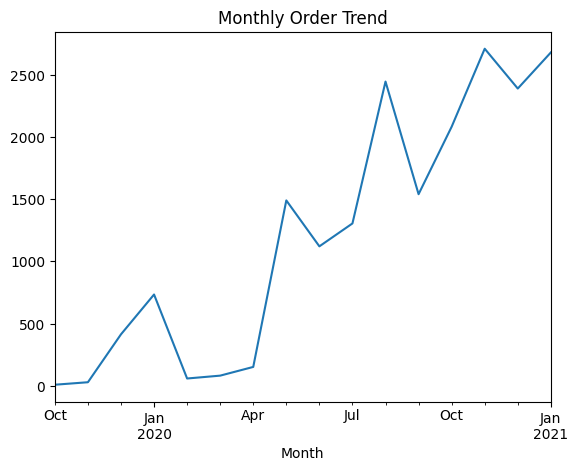

In [19]:
# proper datetime
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])

#month
df['Month'] = df['Order Date & Time'].dt.to_period('M')

#Count 
monthly_orders = df.groupby('Month')['Order Number'].count()

#Plot it
monthly_orders.plot(kind='line', title='Monthly Order Trend')


### Data Cleaning and Export

This step ensures that the dataset is properly loaded and saved with the correct encoding for future use.

### Steps Performed:
- Loaded the dataset using `read_csv()` from the provided file path.
- Exported the same dataset to a new CSV file with **UTF-8 with BOM (`utf-8-sig`) encoding**, which helps avoid character encoding issues when opening in Excel or other programs.
- Disabled the index while saving to keep the file clean.

In [20]:

df = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')
df.to_csv('GP Orders - 5.csv', index=False, encoding='utf-8-sig')


print("Data cleaned and saved successfully!")


Data cleaned and saved successfully!


# Orders Over Time

This analysis visualizes the **daily number of orders** to understand trends over time.

### Steps Performed:
- Converted the `Order Date & Time` column to datetime format.
- Grouped the data by **date only** (excluding time) to count the number of orders per day.
- Plotted a **line chart** to show daily order frequency.

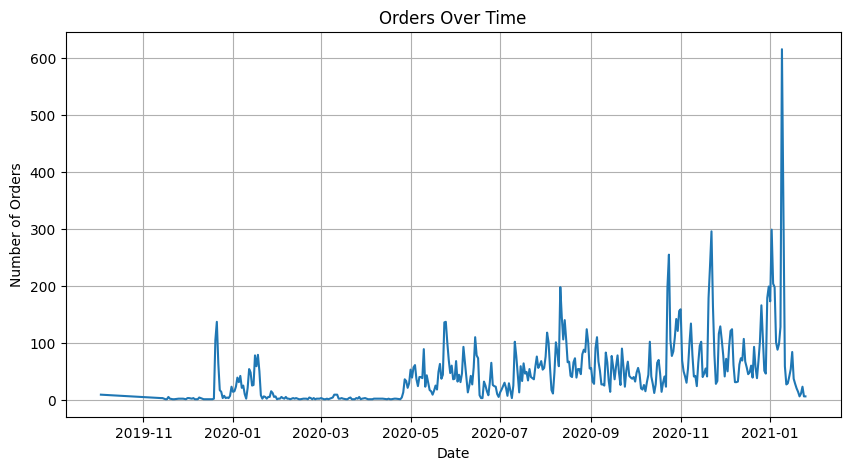

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 

# Assuming 'df' is already defined and contains a column 'Order Date & Time'
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])  # Convert to datetime
orders_per_day = df.groupby(df['Order Date & Time'].dt.date).size()  # Group by date

# Plotting
orders_per_day.plot(kind='line', title='Orders Over Time', ylabel='Number of Orders', xlabel='Date', figsize=(10, 5))
plt.grid()
plt.show()


## Payment Method Usage

This visualization displays the **distribution of payment methods** used by customers.

### Steps Performed:
- Counted how many times each payment method was used in the `Payment Method` column.
- Plotted a **vertical bar chart** to represent the frequency of each method.


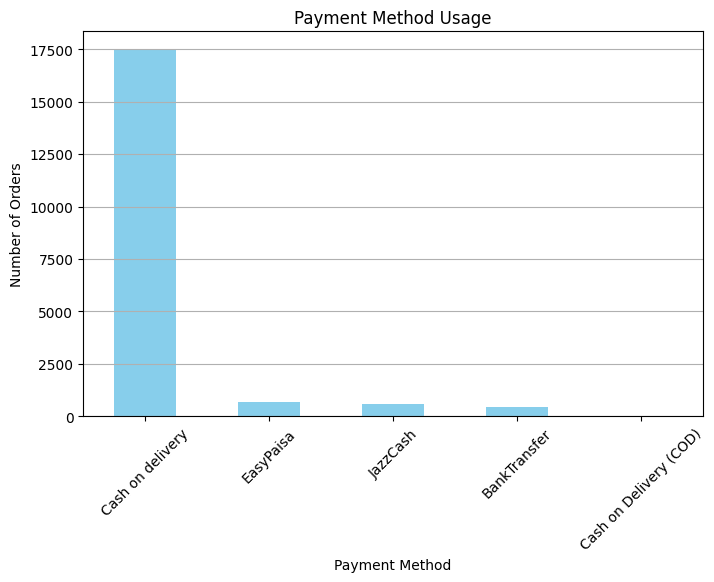

In [22]:
df['Payment Method'].value_counts().plot(kind='bar', title='Payment Method Usage', xlabel='Payment Method', ylabel='Number of Orders', figsize=(8, 5), color='skyblue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


 ## Top 10 Cities by Order Count

This analysis highlights the **top 10 cities** with the highest number of orders using a horizontal bar chart.

###  Steps Performed:
- Counted the number of orders for each city using `value_counts()`.
- Selected the **top 10 cities** based on order count.
- Plotted a **horizontal bar chart** and inverted the y-axis to show the highest at the top.

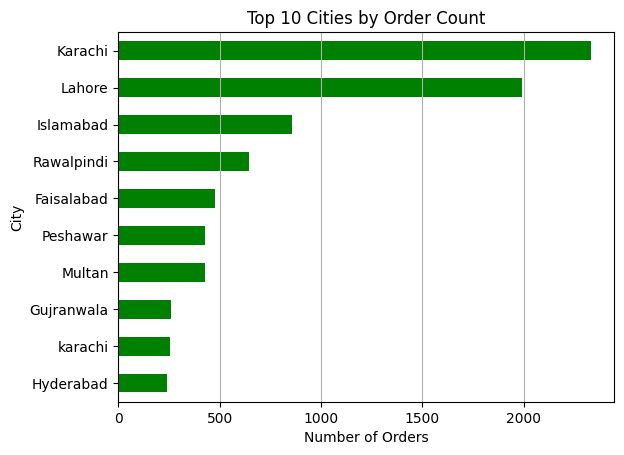

In [23]:
df['City'].value_counts().head(10).plot(kind='barh', title='Top 10 Cities by Order Count', color='green')
plt.xlabel('Number of Orders')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


##  Order Status Distribution

This analysis visualizes the **distribution of order statuses** as a pie chart.

###  Steps Performed:
- Counted the occurrences of each category in the `Order Status` column using `value_counts()`.
- Plotted a **pie chart** with percentage labels.

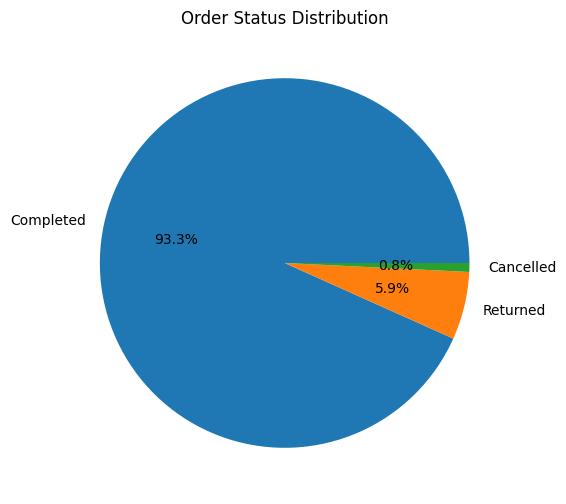

In [24]:
df['Order Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Order Status Distribution', figsize=(6, 6))
plt.ylabel('')
plt.show()


### Average Items Per Order Per Day

This analysis visualizes the **average number of items per order** for each day using the `Order Date & Time` and `Total items` columns from the dataset.

###   Steps Performed:
- Converted the `Order Date & Time` column to datetime format.
- Grouped the data by date and calculated the **average number of items** per day.
- Plotted a **line chart** to show the daily trend.

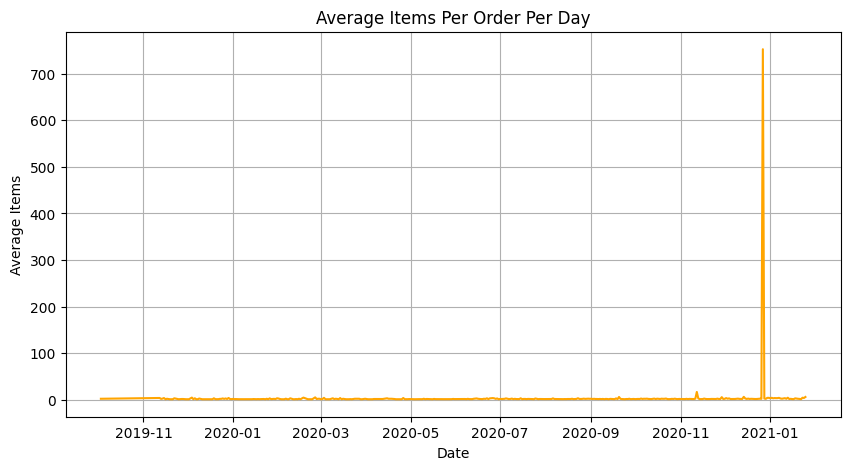

In [25]:
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])
avg_items_per_day = df.groupby(df['Order Date & Time'].dt.date)['Total items'].mean()

avg_items_per_day.plot(kind='line', title='Average Items Per Order Per Day', ylabel='Average Items', xlabel='Date', color='orange', figsize=(10, 5))
plt.grid()
plt.show()


##  Estimated Revenue Calculation Based on Weight

To estimate the revenue from the dataset, we followed these steps:

1. **Converted** the `Total weight (grams)` column to numeric, handling any non-numeric entries.
2. **Assumed a price per gram** (e.g., Rs. 2/gram).
3. **Calculated Estimated Revenue** for each order using the formula:



In [26]:

# Convert weight column to numeric
df['Total weight (grams)'] = pd.to_numeric(df['Total weight (grams)'], errors='coerce')

#price per gram (we can change this rate)
price_per_gram = 2  # Rs. 2 per gram (example)


df['Estimated Revenue'] = df['Total weight (grams)'] * price_per_gram

total_estimated_revenue = df['Estimated Revenue'].sum()
print(f" Estimated Total Revenue: Rs. {total_estimated_revenue:,.2f}")


 Estimated Total Revenue: Rs. 13,996,360.00
